# Quantum Mechanics : Solving Schrodinger Equation

## 1. Particle in a box

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

In [32]:
h = 1
m = 1

a = 1
V = 0


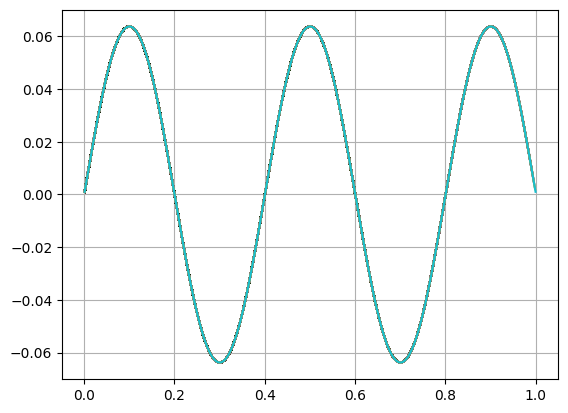

In [34]:
psi=0
dpsi=1
x=0
dx=a*0.001

xlist=[]
psilist=[]

E=123.12

while x<=a:
    ddpsi=2*m/h**2*(V-E)*psi
    dpsi=dpsi+ddpsi*dx
    psi=psi+dpsi*dx
    x=x+dx
    xlist.append(x)
    psilist.append(psi)
    plt.plot(xlist,psilist)
plt.grid()
plt.show()

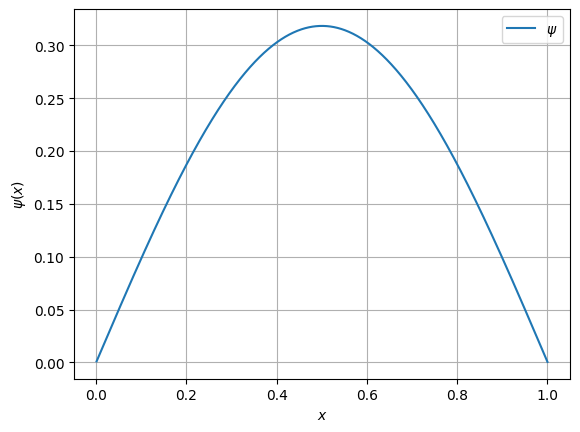

In [31]:

E = 0
dE = 0.01
dx = a*0.001
psi = 1 

while abs(psi)>0.001: 
    psi = 0
    dpsi = 1
    x = 0
    E = E+dE
    xlist = []
    psi_list = []
    
    
    while x<= a:
        ddpsi = 2*m/h**2*(V-E)*psi
        dpsi = dpsi+ddpsi*dx
        psi = psi+dpsi*dx
        x = x+dx
        xlist.append(x)
        psi_list.append(psi)
        
plt.plot(xlist,psi_list,label="$\psi$")
plt.ylabel("$\psi(x)$")
plt.xlabel("$x$")
plt.legend()
plt.grid()       
plt.show()    